In [1]:
import numpy as np
import pandas as pd

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm

import scipy.stats

In [2]:
df = pd.read_csv('./batting_data_1996_2019.csv')
df.head()

,Season,Name,Team,Age,G,AB,PA,H,1B,2B,...,wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),key_mlbam
0,2002,Barry Bonds,Giants,37,143,403,612,149,70,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111188
1,2001,Barry Bonds,Giants,36,153,476,664,156,49,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111188
2,2004,Barry Bonds,Giants,39,147,373,617,135,60,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111188
3,2018,Mookie Betts,Red Sox,25,136,520,614,180,96,47,...,NaN,0.185,0.535,0.356,0.658,0.926,0.855,0.49,23.3,605141
4,2003,Barry Bonds,Giants,38,130,390,550,133,65,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111188


In [3]:
#group by player age, get batting avg
age_avg = df[['Age', 'G', 'H', 'AB', 'HR', 'R', 'RBI', 'SB', 'BB', 'HBP', 'SF', '1B', '2B', '3B']].groupby(['Age'], as_index=False).sum()
age_avg['AVG'] = age_avg['H'] / age_avg['AB']
age_avg['HR_PER_G'] = age_avg['HR'] / age_avg['G']
age_avg['R_PER_G'] = age_avg['R'] / age_avg['G']
age_avg['RBI_PER_G'] = age_avg['RBI'] / age_avg['G']
age_avg['SB_PER_G'] = age_avg['SB'] / age_avg['G']
# OBP = (Hits + Walks + Hit by Pitch) / (At Bats + Walks + Hit by Pitch + Sacrifice Flies). 
age_avg['OBP'] = (age_avg['H'] + age_avg['BB'] + age_avg['HBP']) / (age_avg['AB'] + age_avg['BB'] + age_avg['HBP'] + age_avg['SF'])
# TB = 1b + 2b*2 + 3b*3 + hr*4
age_avg['TB_PER_G'] = (age_avg['1B'] + age_avg['2B']*2 + age_avg['3B']*3 + age_avg['HR']*4) / age_avg['G']
# SLG = TB / AB
age_avg['SLG'] = (age_avg['1B'] + age_avg['2B']*2 + age_avg['3B']*3 + age_avg['HR']*4) / age_avg['AB']

age_avg['DELTA_AVG'] = 0.0
age_avg['PREV_AVG'] = 0.0
age_avg['AVG_PERCENT_CHANGE'] = 0.0

age_avg['DELTA_HR_PER_G'] = 0.0
age_avg['PREV_HR_PER_G'] = 0.0
age_avg['HR_PER_G_PERCENT_CHANGE'] = 0.0

age_avg['DELTA_R_PER_G'] = 0.0
age_avg['PREV_R_PER_G'] = 0.0
age_avg['R_PER_G_PERCENT_CHANGE'] = 0.0

age_avg['DELTA_RBI_PER_G'] = 0.0
age_avg['PREV_RBI_PER_G'] = 0.0
age_avg['RBI_PER_G_PERCENT_CHANGE'] = 0.0

age_avg['DELTA_SB_PER_G'] = 0.0
age_avg['PREV_SB_PER_G'] = 0.0
age_avg['SB_PER_G_PERCENT_CHANGE'] = 0.0

age_avg['DELTA_OBP'] = 0.0
age_avg['PREV_OBP'] = 0.0
age_avg['OBP_PERCENT_CHANGE'] = 0.0

age_avg['DELTA_TB_PER_G'] = 0.0
age_avg['PREV_TB_PER_G'] = 0.0
age_avg['TB_PER_G_PERCENT_CHANGE'] = 0.0

age_avg['DELTA_SLG'] = 0.0
age_avg['PREV_SLG'] = 0.0
age_avg['SLG_PERCENT_CHANGE'] = 0.0

In [4]:
for i, r in age_avg.iterrows():
#     print(i)
    if i != 0:
        age_avg.at[i,'DELTA_AVG'] = age_avg.at[i,'AVG'] - age_avg.at[i-1,'AVG']
        age_avg.at[i,'PREV_AVG'] = age_avg.at[i-1,'AVG']
        age_avg.at[i,'AVG_PERCENT_CHANGE'] = age_avg.at[i,'DELTA_AVG']/age_avg.at[i,'PREV_AVG']
        
        age_avg.at[i,'DELTA_HR_PER_G'] = age_avg.at[i,'HR_PER_G'] - age_avg.at[i-1,'HR_PER_G']
        age_avg.at[i,'PREV_HR_PER_G'] = age_avg.at[i-1,'HR_PER_G']
        age_avg.at[i,'HR_PER_G_PERCENT_CHANGE'] = age_avg.at[i,'DELTA_HR_PER_G']/age_avg.at[i,'PREV_HR_PER_G']
        
        age_avg.at[i,'DELTA_R_PER_G'] = age_avg.at[i,'R_PER_G'] - age_avg.at[i-1,'R_PER_G']
        age_avg.at[i,'PREV_R_PER_G'] = age_avg.at[i-1,'R_PER_G']
        age_avg.at[i,'R_PER_G_PERCENT_CHANGE'] = age_avg.at[i,'DELTA_R_PER_G']/age_avg.at[i,'PREV_R_PER_G']
        
        age_avg.at[i,'DELTA_RBI_PER_G'] = age_avg.at[i,'RBI_PER_G'] - age_avg.at[i-1,'RBI_PER_G']
        age_avg.at[i,'PREV_RBI_PER_G'] = age_avg.at[i-1,'RBI_PER_G']
        age_avg.at[i,'RBI_PER_G_PERCENT_CHANGE'] = age_avg.at[i,'DELTA_RBI_PER_G']/age_avg.at[i,'PREV_RBI_PER_G']
        
        age_avg.at[i,'DELTA_SB_PER_G'] = age_avg.at[i,'SB_PER_G'] - age_avg.at[i-1,'SB_PER_G']
        age_avg.at[i,'PREV_SB_PER_G'] = age_avg.at[i-1,'SB_PER_G']
        age_avg.at[i,'SB_PER_G_PERCENT_CHANGE'] = age_avg.at[i,'DELTA_SB_PER_G']/age_avg.at[i,'PREV_SB_PER_G']
        
        age_avg.at[i,'DELTA_OBP'] = age_avg.at[i,'OBP'] - age_avg.at[i-1,'OBP']
        age_avg.at[i,'PREV_OBP'] = age_avg.at[i-1,'OBP']
        age_avg.at[i,'OBP_PERCENT_CHANGE'] = age_avg.at[i,'DELTA_OBP']/age_avg.at[i,'PREV_OBP']
        
        age_avg.at[i,'DELTA_TB_PER_G'] = age_avg.at[i,'TB_PER_G'] - age_avg.at[i-1,'TB_PER_G']
        age_avg.at[i,'PREV_TB_PER_G'] = age_avg.at[i-1,'TB_PER_G']
        age_avg.at[i,'TB_PER_G_PERCENT_CHANGE'] = age_avg.at[i,'DELTA_TB_PER_G']/age_avg.at[i,'PREV_TB_PER_G']
        
        age_avg.at[i,'DELTA_SLG'] = age_avg.at[i,'SLG'] - age_avg.at[i-1,'SLG']
        age_avg.at[i,'PREV_SLG'] = age_avg.at[i-1,'SLG']
        age_avg.at[i,'SLG_PERCENT_CHANGE'] = age_avg.at[i,'DELTA_SLG']/age_avg.at[i,'PREV_SLG']

        
age_avg.head()

,Age,G,H,AB,HR,R,RBI,SB,BB,HBP,...,SB_PER_G_PERCENT_CHANGE,DELTA_OBP,PREV_OBP,OBP_PERCENT_CHANGE,DELTA_TB_PER_G,PREV_TB_PER_G,TB_PER_G_PERCENT_CHANGE,DELTA_SLG,PREV_SLG,SLG_PERCENT_CHANGE
0,19,648,612,2292,79,352,260,57,233,11,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,20,3225,3232,11666,396,1750,1542,344,1116,115,...,0.212632,0.007438,0.336346,0.022114,0.068941,1.555556,0.044319,0.009292,0.439791,0.021129
2,21,8949,8432,31390,936,4290,3840,833,2653,290,...,-0.127347,-0.014598,0.343784,-0.042464,-0.143660,1.624496,-0.088434,-0.026910,0.449083,-0.059922
3,22,26012,24111,90180,2687,12574,11202,1994,7649,818,...,-0.176467,-0.001125,0.329185,-0.003419,-0.009784,1.480836,-0.006607,0.002145,0.422173,0.005082
4,23,46209,41036,155813,4656,21120,19065,3368,13205,1459,...,-0.049189,-0.003373,0.328060,-0.010283,-0.055051,1.471052,-0.037423,-0.004379,0.424318,-0.010319


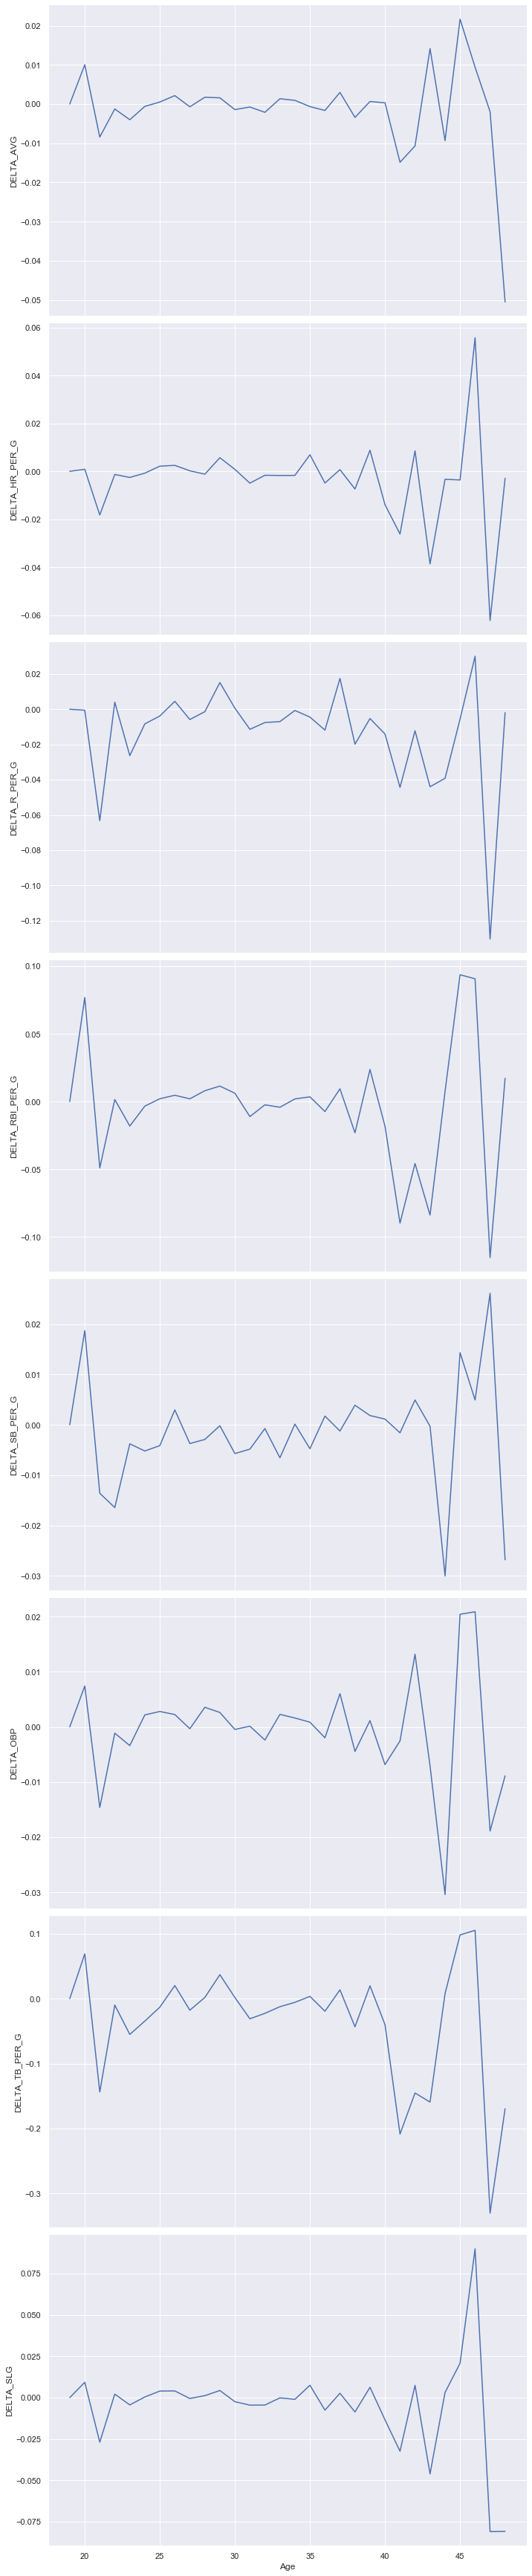

In [5]:
g = sns.PairGrid(age_avg, y_vars=["DELTA_AVG",
                                   "DELTA_HR_PER_G",
                                   "DELTA_R_PER_G",
                                   "DELTA_RBI_PER_G",
                                   "DELTA_SB_PER_G",
                                   "DELTA_OBP",
                                   "DELTA_TB_PER_G",
                                   "DELTA_SLG"], 
                 x_vars=["Age"], height=6, aspect = 1.6)

g.map(sns.lineplot, markers=True)

In [6]:
# explore percent change by age and previous season's stat
df2 = df[['key_mlbam', 'Age', 'G', 'AVG', 'OBP', 'SLG', 'H', 'AB', 'HR', 'R', 'RBI', 'SB', 'BB', 'HBP', 'SF', '1B', '2B', '3B']]
df2['HR_PER_G'] = df2['HR'] / df2['G']
df2['R_PER_G'] = df2['R'] / df2['G']
df2['RBI_PER_G'] = df2['RBI'] / df2['G']
df2['SB_PER_G'] = df2['SB'] / df2['G']
df2['TB_PER_G'] = (df2['1B'] + df2['2B']*2 + df2['3B']*3 + df2['HR']*4) / df2['G']

df2['DELTA_AVG'] = float("NaN")
df2['PREV_AVG'] = float("NaN")
df2['AVG_PERCENT_CHANGE'] = float("NaN")

df2['DELTA_HR_PER_G'] = float("NaN")
df2['PREV_HR_PER_G'] = float("NaN")
df2['HR_PER_G_PERCENT_CHANGE'] = float("NaN")

df2['DELTA_R_PER_G'] = float("NaN")
df2['PREV_R_PER_G'] = float("NaN")
df2['R_PER_G_PERCENT_CHANGE'] = float("NaN")

df2['DELTA_RBI_PER_G'] = float("NaN")
df2['PREV_RBI_PER_G'] = float("NaN")
df2['RBI_PER_G_PERCENT_CHANGE'] = float("NaN")

df2['DELTA_SB_PER_G'] = float("NaN")
df2['PREV_SB_PER_G'] = float("NaN")
df2['SB_PER_G_PERCENT_CHANGE'] = float("NaN")

df2['DELTA_TB_PER_G'] = float("NaN")
df2['PREV_TB_PER_G'] = float("NaN")
df2['TB_PER_G_PERCENT_CHANGE'] = float("NaN")

df2['DELTA_OBP'] = float("NaN")
df2['PREV_OBP'] = float("NaN")
df2['OBP_PERCENT_CHANGE'] = float("NaN")

df2['DELTA_SLG'] = float("NaN")
df2['PREV_SLG'] = float("NaN")
df2['SLG_PERCENT_CHANGE'] = float("NaN")

for i, r in df2.iterrows():
    prev = df2[ (df2.key_mlbam==r.key_mlbam) & (df2['Age']==(r['Age']-1)) ]

    if len(prev)==1:
        df2.at[i,'DELTA_AVG'] = r.AVG - prev.AVG
        df2.at[i,'PREV_AVG'] = prev.AVG
        df2.at[i,'AVG_PERCENT_CHANGE'] = df2.at[i,'DELTA_AVG']/df2.at[i,'PREV_AVG']
        
        df2.at[i,'DELTA_HR_PER_G'] = r.HR_PER_G - prev.HR_PER_G
        df2.at[i,'PREV_HR_PER_G'] = prev.HR_PER_G
        df2.at[i,'HR_PER_G_PERCENT_CHANGE'] = df2.at[i,'DELTA_HR_PER_G']/df2.at[i,'PREV_HR_PER_G']
        
        df2.at[i,'DELTA_R_PER_G'] = r.R_PER_G - prev.R_PER_G
        df2.at[i,'PREV_R_PER_G'] = prev.R_PER_G
        df2.at[i,'R_PER_G_PERCENT_CHANGE'] = df2.at[i,'DELTA_R_PER_G']/df2.at[i,'PREV_R_PER_G']
        
        df2.at[i,'DELTA_RBI_PER_G'] = r.RBI_PER_G - prev.RBI_PER_G
        df2.at[i,'PREV_RBI_PER_G'] = prev.RBI_PER_G
        df2.at[i,'RBI_PER_G_PERCENT_CHANGE'] = df2.at[i,'DELTA_RBI_PER_G']/df2.at[i,'PREV_RBI_PER_G']
        
        df2.at[i,'DELTA_SB_PER_G'] = r.SB_PER_G - prev.SB_PER_G
        df2.at[i,'PREV_SB_PER_G'] = prev.SB_PER_G
        df2.at[i,'SB_PER_G_PERCENT_CHANGE'] = df2.at[i,'DELTA_SB_PER_G']/df2.at[i,'PREV_SB_PER_G']
        
        df2.at[i,'DELTA_TB_PER_G'] = r.TB_PER_G - prev.TB_PER_G
        df2.at[i,'PREV_TB_PER_G'] = prev.TB_PER_G
        df2.at[i,'TB_PER_G_PERCENT_CHANGE'] = df2.at[i,'DELTA_TB_PER_G']/df2.at[i,'PREV_TB_PER_G']
        
        df2.at[i,'DELTA_OBP'] = r.OBP - prev.OBP
        df2.at[i,'PREV_OBP'] = prev.OBP
        df2.at[i,'OBP_PERCENT_CHANGE'] = df2.at[i,'DELTA_OBP']/df2.at[i,'PREV_OBP']
        
        df2.at[i,'DELTA_SLG'] = r.SLG - prev.SLG
        df2.at[i,'PREV_SLG'] = prev.SLG
        df2.at[i,'SLG_PERCENT_CHANGE'] = df2.at[i,'DELTA_SLG']/df2.at[i,'PREV_SLG']

# remove any rows where we dont have previous season data...ex: a player's first season
df2.dropna(axis=0, how='any', inplace=True)
df2.head()

/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is tr

/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in double_scalars
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in double_scalars
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in double_scalars
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in double_scalars
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:78: SettingWithCo

,key_mlbam,Age,G,AVG,OBP,SLG,H,AB,HR,R,...,SB_PER_G_PERCENT_CHANGE,DELTA_TB_PER_G,PREV_TB_PER_G,TB_PER_G_PERCENT_CHANGE,DELTA_OBP,PREV_OBP,OBP_PERCENT_CHANGE,DELTA_SLG,PREV_SLG,SLG_PERCENT_CHANGE
0,111188,37,143,0.370,0.582,0.799,149,403,46,117,...,-0.259279,-0.434526,2.686275,-0.161758,0.067,0.515,0.130097,-0.064,0.863,-0.074160
1,111188,36,153,0.328,0.515,0.863,156,476,73,129,...,0.104575,0.378582,2.307692,0.164052,0.075,0.440,0.170455,0.175,0.688,0.254360
2,111188,39,147,0.362,0.609,0.812,135,373,45,129,...,-0.241983,-0.184929,2.246154,-0.082332,0.080,0.529,0.151229,0.063,0.749,0.084112
3,605141,25,136,0.346,0.438,0.640,180,520,32,129,...,0.298077,0.566176,1.882353,0.300781,0.094,0.344,0.273256,0.181,0.459,0.394336
4,111188,38,130,0.341,0.529,0.749,133,390,45,111,...,-0.144444,-0.005594,2.251748,-0.002484,-0.053,0.582,-0.091065,-0.050,0.799,-0.062578


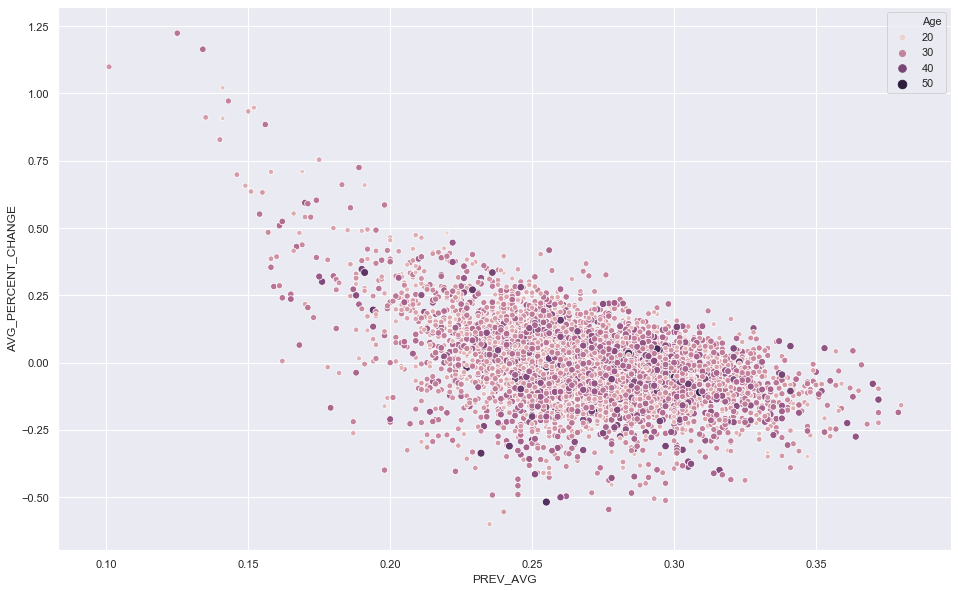

In [7]:
# explore delta of avg by age 
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_AVG", y="AVG_PERCENT_CHANGE", data=df2, size='Age', hue='Age')

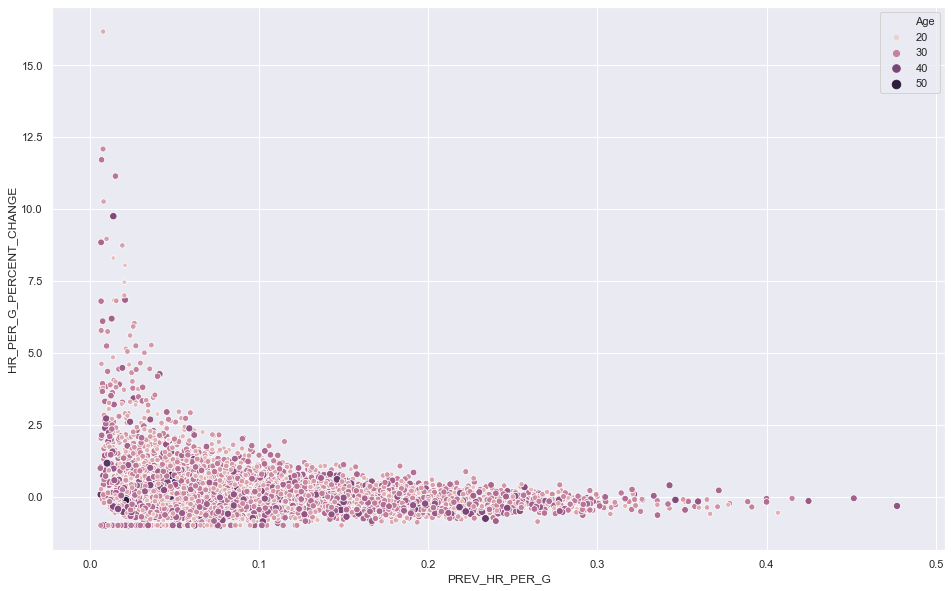

In [8]:
# explore delta of avg by age 
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_HR_PER_G", y="HR_PER_G_PERCENT_CHANGE", data=df2, size='Age', hue='Age')

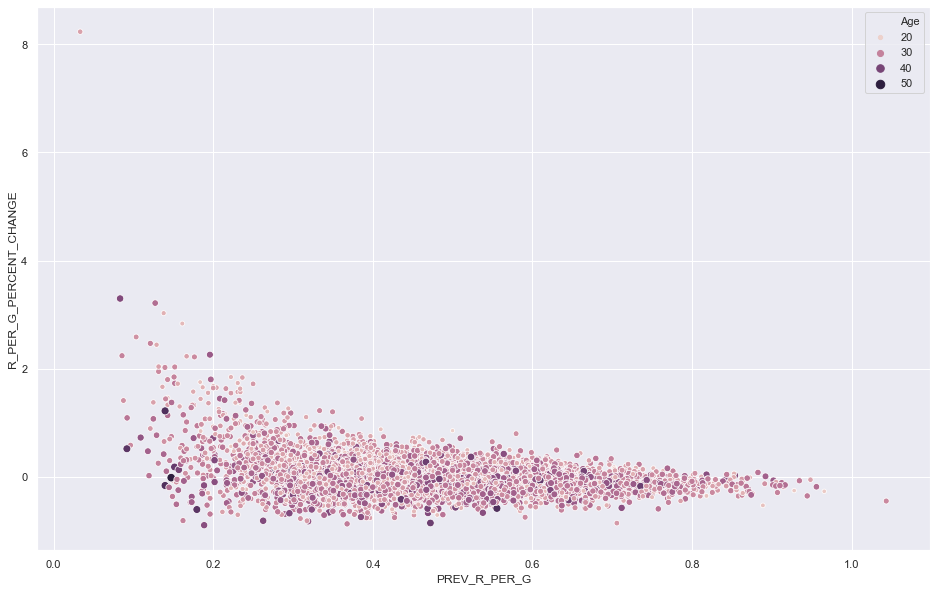

In [9]:
# explore delta of avg by age 
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_R_PER_G", y="R_PER_G_PERCENT_CHANGE", data=df2, size='Age', hue='Age')

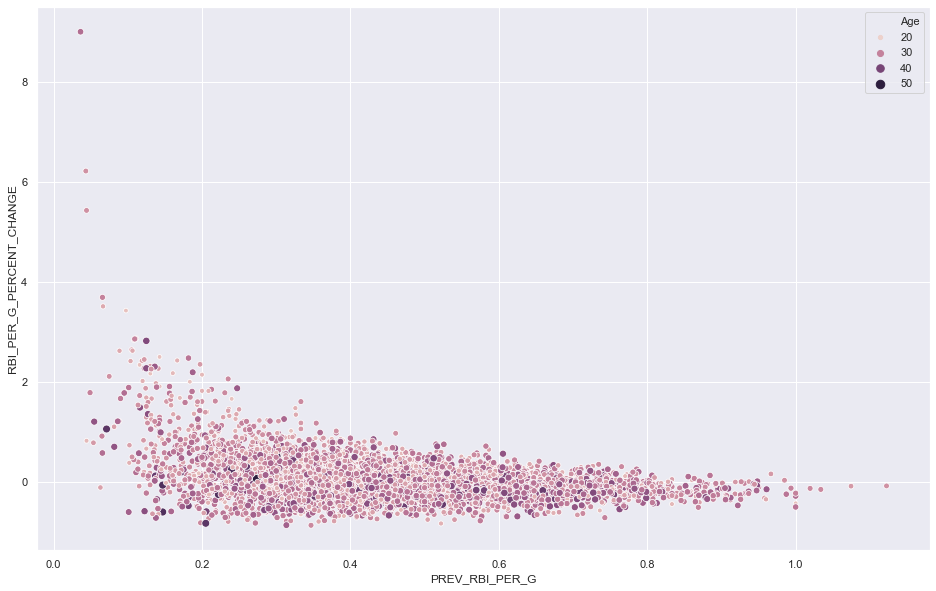

In [10]:
# explore delta of avg by age 
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_RBI_PER_G", y="RBI_PER_G_PERCENT_CHANGE", data=df2, size='Age', hue='Age')

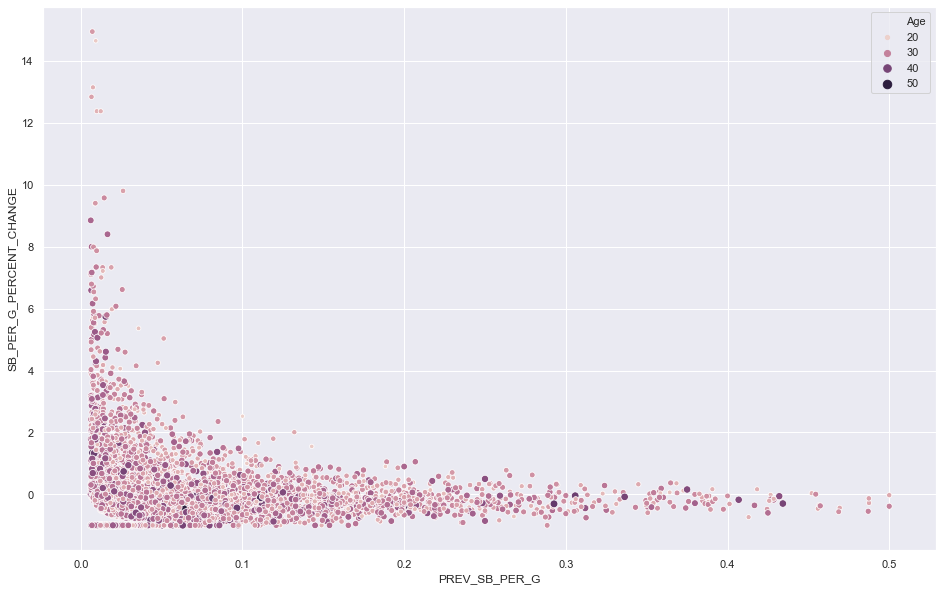

In [11]:
# explore delta of avg by age 
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_SB_PER_G", y="SB_PER_G_PERCENT_CHANGE", data=df2, size='Age', hue='Age')

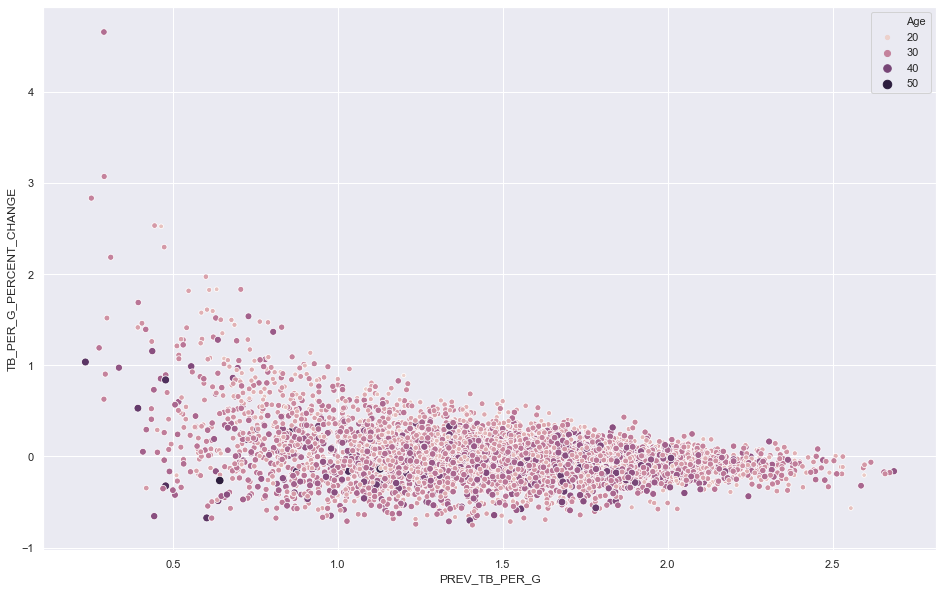

In [12]:
# explore delta of avg by age 
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_TB_PER_G", y="TB_PER_G_PERCENT_CHANGE", data=df2, size='Age', hue='Age')

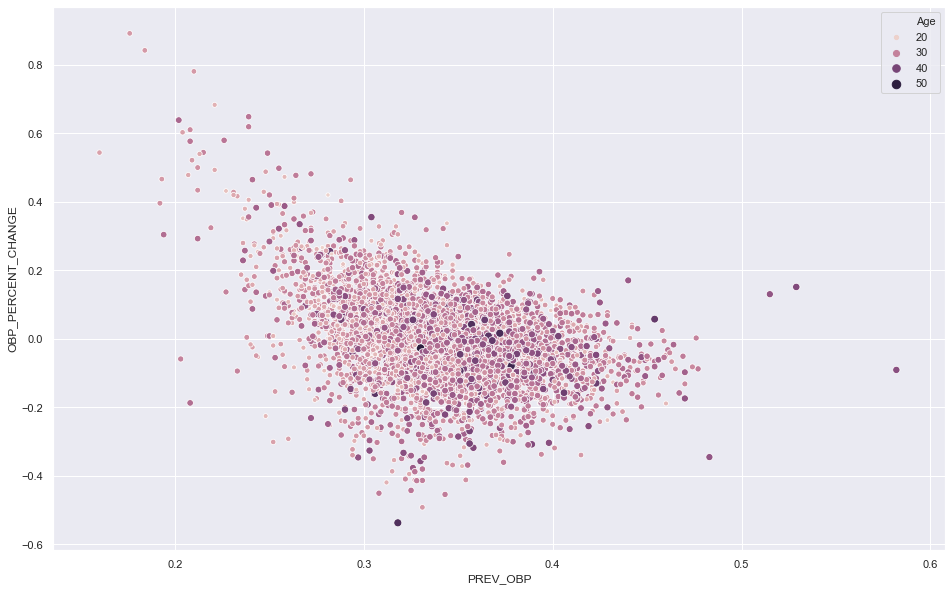

In [13]:
# explore delta of avg by age 
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_OBP", y="OBP_PERCENT_CHANGE", data=df2, size='Age', hue='Age')

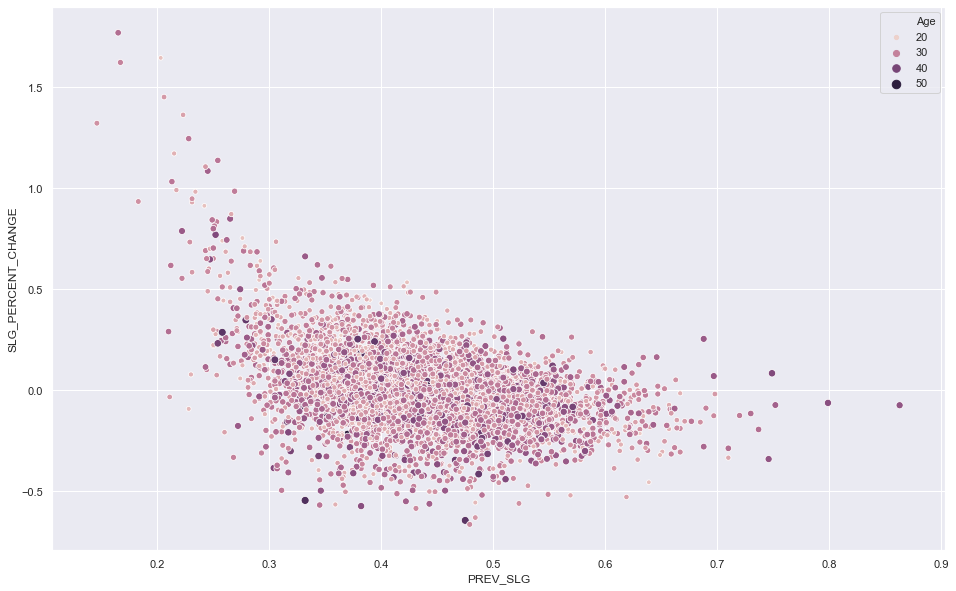

In [14]:
# explore delta of avg by age 
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_SLG", y="SLG_PERCENT_CHANGE", data=df2, size='Age', hue='Age')

In [15]:
mod_avg = sm.ols(formula="AVG_PERCENT_CHANGE ~ Age + PREV_AVG", data=df2[df2.AVG > 0]).fit()
print(mod_avg.summary())

mod_hr = sm.ols(formula="HR_PER_G_PERCENT_CHANGE ~ Age + PREV_HR_PER_G", data=df2[df2.PREV_HR_PER_G > 0]).fit()
print(mod_hr.summary())

mod_r = sm.ols(formula="R_PER_G_PERCENT_CHANGE ~ Age + PREV_R_PER_G", data=df2[df2.PREV_R_PER_G > 0]).fit()
print(mod_r.summary())

mod_rbi = sm.ols(formula="RBI_PER_G_PERCENT_CHANGE ~ Age + PREV_RBI_PER_G", data=df2[df2.PREV_RBI_PER_G > 0]).fit()
print(mod_rbi.summary())

mod_sb = sm.ols(formula="SB_PER_G_PERCENT_CHANGE ~ Age + PREV_SB_PER_G", data=df2[df2.PREV_SB_PER_G > 0]).fit()
print(mod_sb.summary())

mod_tb = sm.ols(formula="TB_PER_G_PERCENT_CHANGE ~ Age + PREV_TB_PER_G", data=df2[df2.PREV_TB_PER_G > 0]).fit()
print(mod_tb.summary())

mod_obp = sm.ols(formula="OBP_PERCENT_CHANGE ~ Age + PREV_OBP", data=df2[df2.PREV_OBP > 0]).fit()
print(mod_obp.summary())

mod_slg = sm.ols(formula="SLG_PERCENT_CHANGE ~ Age + PREV_SLG", data=df2[df2.PREV_SLG > 0]).fit()
print(mod_slg.summary())

                            OLS Regression Results                            
Dep. Variable:     AVG_PERCENT_CHANGE   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     916.9
Date:                Wed, 15 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:42:54   Log-Likelihood:                 3278.6
No. Observations:                5318   AIC:                            -6551.
Df Residuals:                    5315   BIC:                            -6531.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6782      0.019     34.863      0.0

                            OLS Regression Results                            
Dep. Variable:     SLG_PERCENT_CHANGE   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     643.5
Date:                Wed, 15 Apr 2020   Prob (F-statistic):          5.62e-251
Time:                        18:42:54   Log-Likelihood:                 1686.1
No. Observations:                5318   AIC:                            -3366.
Df Residuals:                    5315   BIC:                            -3346.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6011      0.022     26.838      0.0

In [16]:
def determine_change_prob(stat, predicted, age, prev, data, mod):
    
    percent_change = (predicted-prev)/prev
    prev_stat_name = 'PREV_{0}'.format(stat)
    
    ind = ['Age', prev_stat_name]
    row = [age, prev] 

    # create Pandas Series with defined indexes 
    x = pd.Series(row, index = ind) 

    avg_age = np.mean(data['Age'])
    # might need to change how to get previous season's batting average among all players
    avg_prev_avg = np.mean(data[prev_stat_name])
    
    model_mu = mod.predict(x)
    cov = np.cov(df2['Age'],data[prev_stat_name])[0][1]
    ## formula for model variance here https://link.springer.com/content/pdf/bbm%3A978-0-585-25657-3%2F1.pdf
    model_var = mod.params[1]**2 * np.var(data['Age']) + mod.params[2]**2 * np.var(data[prev_stat_name]) + 2*mod.params[1]*mod.params[2]*cov
    model_std = np.sqrt(model_var)
    
    prob = 1-scipy.stats.norm(model_mu, model_std).cdf(percent_change)[0]
    
    return prob, percent_change, predicted

In [17]:
determine_change_prob('AVG', 0.280, 27, 0.300, df2, mod_avg)

(0.4828803113093362, -0.06666666666666654, 0.28)

In [18]:
df2020 = pd.read_csv('./batting_data_1996_2020.csv')
df2020.head()

,Season,Name,Team,Age,G,AB,PA,H,1B,2B,...,PH,WPA/LI,Clutch,BsR,Def,wSB,Off,Lg,TTO%,key_mlbam
0,2002,Barry Bonds,Giants,37.0,143.0,403.0,612.0,149.0,70.0,31.0,...,4.0,11.82,-1.11,-1.2,-2.0,0.9,108.9,1.2,0.476,111188
1,2001,Barry Bonds,Giants,36.0,153.0,476.0,664.0,156.0,49.0,32.0,...,5.0,13.04,-1.04,1.3,-12.0,1.3,118.0,1.0,0.517,111188
2,2004,Barry Bonds,Giants,39.0,147.0,373.0,617.0,135.0,60.0,27.0,...,8.0,11.35,1.15,-0.3,-4.4,0.6,105.7,1.7,0.515,111188
3,2018,Mookie Betts,Red Sox,25.0,136.0,520.0,614.0,180.0,96.0,47.0,...,4.0,6.44,-0.15,6.9,11.6,3.1,69.2,1.9,0.332,605141
4,2003,Barry Bonds,Giants,38.0,130.0,390.0,550.0,133.0,65.0,22.0,...,2.0,8.38,-0.34,0.7,5.6,1.3,80.0,1.1,0.456,111188


In [19]:
df2020 = df2020[(df2020.Season == 2020) | (df2020.Season == 2019)]

In [20]:
df2020['prob_AVG'] = float("NaN")
df2020['prob_HR'] = float("NaN")
df2020['prob_R'] = float("NaN")
df2020['prob_RBI'] = float("NaN")
df2020['prob_SB'] = float("NaN")
df2020['prob_TB'] = float("NaN")
df2020['prob_OBP'] = float("NaN")
df2020['prob_SLG'] = float("NaN")

for i, r in df2020.iterrows():
    if r.Season == 2020:
        # look for previous season for player
        prev = df2020[(df2020.Season == 2019) & (df2020.Name == r.Name)]
        
        # played less than a third of the season, set probs to 0
        if prev.G.values[0] < 50:
            df2020.at[i,'prob_AVG'] = 0.0
            df2020.at[i,'prob_HR'] = 0.0
            df2020.at[i,'prob_R'] = 0.0
            df2020.at[i,'prob_RBI'] = 0.0
            df2020.at[i,'prob_SB'] = 0.0
            df2020.at[i,'prob_TB'] = 0.0
            df2020.at[i,'prob_OBP'] = 0.0
            df2020.at[i,'prob_SLG'] = 0.0
            continue
        
        # get players age for 2020 season
        age = prev.Age.values[0]+1
        
        # get prob for AVG
        prev_avg = prev.AVG.values[0]
        pred_avg = r.AVG

        prob, _, _ = determine_change_prob('AVG', pred_avg, age, prev_avg, df2, mod_avg)
        
        df2020.at[i,'prob_AVG'] = prob
        
        # get prob for HR
        if prev.G.values[0] != 0:
            prev_hr_per_g = prev.HR.values[0] / prev.G.values[0]
        else:
            prev_hr_per_g = 0
            
        pred_hr_per_g = r.HR / prev.G.values[0]

        prob, _, _ = determine_change_prob('HR_PER_G', pred_hr_per_g, age, prev_hr_per_g, df2, mod_hr)
        
        df2020.at[i,'prob_HR'] = prob
        
        # get prob for R
        prev_r_per_g = prev.R.values[0] / prev.G.values[0]
        pred_r_per_g = r.R / prev.G.values[0]

        prob, _, _ = determine_change_prob('R_PER_G', pred_r_per_g, age, prev_r_per_g, df2, mod_r)
        
        df2020.at[i,'prob_R'] = prob
        
        # get prob for RBI
        prev_rbi_per_g = prev.RBI.values[0] / prev.G.values[0]
        pred_rbi_per_g = r.RBI / prev.G.values[0]

        prob, _, _ = determine_change_prob('RBI_PER_G', pred_rbi_per_g, age, prev_rbi_per_g, df2, mod_rbi)
        
        df2020.at[i,'prob_RBI'] = prob
        
        # get prob for SB
        prev_sb_per_g = prev.SB.values[0] / prev.G.values[0]
        pred_sb_per_g = r.SB / prev.G.values[0]

        prob, _, _ = determine_change_prob('SB_PER_G', pred_sb_per_g, age, prev_sb_per_g, df2, mod_sb)
        
        if pd.isnull(prob):
            df2020.at[i,'prob_SB'] = 0
        else:
            df2020.at[i,'prob_SB'] = prob
        
        # get prob for TB
        prev_tb_per_g = prev.TB.values[0] / prev.G.values[0]
        pred_tb_per_g = r.TB / prev.G.values[0]

        prob, _, _ = determine_change_prob('TB_PER_G', pred_tb_per_g, age, prev_tb_per_g, df2, mod_tb)
        
        df2020.at[i,'prob_TB'] = prob
        
        # get prob for OBP
        prev_obp = prev.OBP.values[0]
        pred_obp = r.OBP

        prob, _, _ = determine_change_prob('OBP', pred_obp, age, prev_obp, df2, mod_obp)
        
        df2020.at[i,'prob_OBP'] = prob
        
        # get prob for SLG
        prev_slg = prev.SLG.values[0]
        pred_slg = r.SLG

        prob, _, _ = determine_change_prob('SLG', pred_slg, age, prev_slg, df2, mod_slg)
        
        df2020.at[i,'prob_SLG'] = prob

/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
sub = df2020[(df2020.Season == 2020)]
rows_per_grp = np.floor(len(sub)/3)

sub.loc[:,'prob_AVG_rank'] = sub.prob_AVG.rank(ascending=False)
sub.loc[:,'prob_HR_rank'] = sub.prob_HR.rank(ascending=False)
sub.loc[:,'prob_R_rank'] = sub.prob_R.rank(ascending=False)
sub.loc[:,'prob_RBI_rank'] = sub.prob_RBI.rank(ascending=False)
sub.loc[:,'prob_SB_rank'] = sub.prob_SB.rank(ascending=False)
sub.loc[:,'prob_TB_rank'] = sub.prob_TB.rank(ascending=False)
sub.loc[:,'prob_OBP_rank'] = sub.prob_OBP.rank(ascending=False)
sub.loc[:,'prob_SLG_rank'] = sub.prob_SLG.rank(ascending=False)

sub.loc[sub.prob_AVG_rank <= rows_per_grp, "prob_AVG_rank_grp"] = 1
sub.loc[(sub.prob_AVG_rank > rows_per_grp) & (sub.prob_AVG_rank <= rows_per_grp*2), "prob_AVG_rank_grp"] = 2
sub.loc[sub.prob_AVG_rank > rows_per_grp*2, "prob_AVG_rank_grp"] = 3

sub.loc[sub.prob_HR_rank <= rows_per_grp, "prob_HR_rank_grp"] = 1
sub.loc[(sub.prob_HR_rank > rows_per_grp) & (sub.prob_HR_rank <= rows_per_grp*2), "prob_HR_rank_grp"] = 2
sub.loc[sub.prob_HR_rank > rows_per_grp*2, "prob_HR_rank_grp"] = 3

sub.loc[sub.prob_R_rank <= rows_per_grp, "prob_R_rank_grp"] = 1
sub.loc[(sub.prob_R_rank > rows_per_grp) & (sub.prob_R_rank <= rows_per_grp*2), "prob_R_rank_grp"] = 2
sub.loc[sub.prob_R_rank > rows_per_grp*2, "prob_R_rank_grp"] = 3

sub.loc[sub.prob_RBI_rank <= rows_per_grp, "prob_RBI_rank_grp"] = 1
sub.loc[(sub.prob_RBI_rank > rows_per_grp) & (sub.prob_RBI_rank <= rows_per_grp*2), "prob_RBI_rank_grp"] = 2
sub.loc[sub.prob_RBI_rank > rows_per_grp*2, "prob_RBI_rank_grp"] = 3

sub.loc[sub.prob_SB_rank <= rows_per_grp, "prob_SB_rank_grp"] = 1
sub.loc[(sub.prob_SB_rank > rows_per_grp) & (sub.prob_SB_rank <= rows_per_grp*2), "prob_SB_rank_grp"] = 2
sub.loc[sub.prob_SB_rank > rows_per_grp*2, "prob_SB_rank_grp"] = 3

sub.loc[sub.prob_TB_rank <= rows_per_grp, "prob_TB_rank_grp"] = 1
sub.loc[(sub.prob_TB_rank > rows_per_grp) & (sub.prob_TB_rank <= rows_per_grp*2), "prob_TB_rank_grp"] = 2
sub.loc[sub.prob_TB_rank > rows_per_grp*2, "prob_TB_rank_grp"] = 3

sub.loc[sub.prob_OBP_rank <= rows_per_grp, "prob_OBP_rank_grp"] = 1
sub.loc[(sub.prob_OBP_rank > rows_per_grp) & (sub.prob_OBP_rank <= rows_per_grp*2), "prob_OBP_rank_grp"] = 2
sub.loc[sub.prob_OBP_rank > rows_per_grp*2, "prob_OBP_rank_grp"] = 3

sub.loc[sub.prob_SLG_rank <= rows_per_grp, "prob_SLG_rank_grp"] = 1
sub.loc[(sub.prob_SLG_rank > rows_per_grp) & (sub.prob_SLG_rank <= rows_per_grp*2), "prob_SLG_rank_grp"] = 2
sub.loc[sub.prob_SLG_rank > rows_per_grp*2, "prob_SLG_rank_grp"] = 3

/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [22]:
sub.head()

,Season,Name,Team,Age,G,AB,PA,H,1B,2B,...,prob_OBP_rank,prob_SLG_rank,prob_AVG_rank_grp,prob_HR_rank_grp,prob_R_rank_grp,prob_RBI_rank_grp,prob_SB_rank_grp,prob_TB_rank_grp,prob_OBP_rank_grp,prob_SLG_rank_grp
11830,2020,Mookie Betts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,328.0,326.0,3.0,2.0,2.0,2.0,1.0,2.0,3.0,3.0
11831,2020,Mike Trout,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,334.0,315.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0
11832,2020,Christian Yelich,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,322.0,324.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0
11833,2020,Alex Bregman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,317.0,317.0,3.0,2.0,1.0,2.0,1.0,1.0,3.0,3.0
11834,2020,Francisco Lindor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,283.0,242.0,3.0,1.0,2.0,2.0,1.0,2.0,3.0,2.0


In [23]:
inj = pd.read_csv('./2019_injury_mlb_api.csv')
inj.head()

inj['days_injured'] = pd.to_datetime(inj.injury_end_date) - pd.to_datetime(inj.injury_start_date)
inj.days_injured = inj.days_injured / np.timedelta64(1, 'D')

inj.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,playerid,injury_start_date,injury_end_date,days_injured
0,0,0,0,0,456501,2019-02-13T00:00:00,2019-09-10T00:00:00,209.0
1,1,1,1,1,534910,2019-02-13T00:00:00,2019-09-03T00:00:00,202.0
2,2,2,2,2,640455,2019-02-13T00:00:00,2019-09-01T00:00:00,200.0
3,3,3,3,3,608665,2019-02-13T00:00:00,2019-11-04T00:00:00,264.0
4,4,4,4,4,592836,2019-02-13T00:00:00,2019-09-29T00:00:00,228.0


In [24]:
for i, r in sub.iterrows():
    prev = inj[(inj.playerid == r.key_mlbam)]
    if len(prev) > 0:
        sub.at[i,'prev_season_days_injured'] = prev.days_injured.values[0]
    else:
        sub.at[i,'prev_season_days_injured'] = 0

/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [25]:
risk_features = sub.loc[:, ['Name'
                            ,'prob_AVG_rank_grp'
                            ,'prob_HR_rank_grp'
                            ,'prob_R_rank_grp'
                            ,'prob_RBI_rank_grp'
                            ,'prob_SB_rank_grp'
                            ,'prob_TB_rank_grp'
                            ,'prob_OBP_rank_grp'
                            ,'prob_SLG_rank_grp'
                            ,'prev_season_days_injured']]

risk_features.reset_index(inplace=True,drop=True)
risk_features.head()

,Name,prob_AVG_rank_grp,prob_HR_rank_grp,prob_R_rank_grp,prob_RBI_rank_grp,prob_SB_rank_grp,prob_TB_rank_grp,prob_OBP_rank_grp,prob_SLG_rank_grp,prev_season_days_injured
0,Mookie Betts,3.0,2.0,2.0,2.0,1.0,2.0,3.0,3.0,0.0
1,Mike Trout,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,0.0
2,Christian Yelich,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,0.0
3,Alex Bregman,3.0,2.0,1.0,2.0,1.0,1.0,3.0,3.0,0.0
4,Francisco Lindor,3.0,1.0,2.0,2.0,1.0,2.0,3.0,2.0,23.0


In [26]:
from sklearn.cluster import KMeans
from collections import Counter, defaultdict


kmeans = KMeans(n_clusters=3, random_state=2020).fit(risk_features.iloc[:,1:])

print(Counter(kmeans.labels_))

## kmeans encoding
## 0 = low
## 1 = high
## 2 = medium

risk_features['overall_risk'] = 0

for i,v in enumerate(kmeans.labels_):
    ## re-encode such that
    ## 0 = low
    ## 1 = medium
    ## 2 = high
    
    if v == 1:
        risk = 2
    elif v == 2:
        risk = 1
    else:
        risk = v
    
    risk_features.iloc[i,10] = v

Counter({0: 286, 2: 63, 1: 36})


In [27]:
for i,r in sub.iterrows():
    risk = risk_features[risk_features.Name == r.Name]
    risk = risk.overall_risk.values[0]
#     print(risk)
#     break
    
    sub.at[i,'overall_risk'] = risk

/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [28]:
sub.head()

,Season,Name,Team,Age,G,AB,PA,H,1B,2B,...,prob_AVG_rank_grp,prob_HR_rank_grp,prob_R_rank_grp,prob_RBI_rank_grp,prob_SB_rank_grp,prob_TB_rank_grp,prob_OBP_rank_grp,prob_SLG_rank_grp,prev_season_days_injured,overall_risk
11830,2020,Mookie Betts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.0,2.0,2.0,1.0,2.0,3.0,3.0,0.0,0.0
11831,2020,Mike Trout,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,0.0,0.0
11832,2020,Christian Yelich,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,0.0,0.0
11833,2020,Alex Bregman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.0,1.0,2.0,1.0,1.0,3.0,3.0,0.0,0.0
11834,2020,Francisco Lindor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,2.0,2.0,1.0,2.0,3.0,2.0,23.0,2.0


In [33]:
sub[sub.overall_risk == 2].Name.unique()

array(['Francisco Lindor', 'Andrelton Simmons', 'Aaron Judge',
       'Jose Altuve', 'Trea Turner', 'Joey Wendle', 'Travis Shaw',
       'Matt Olson', 'Brian Anderson', 'Enrique Hernandez',
       'Stephen Piscotty', 'Chris Taylor', 'George Springer',
       'Shohei Ohtani', 'Marcell Ozuna', 'Joey Gallo', 'Nick Markakis',
       'Jose Martinez', 'Ramon Laureano', 'Yoan Moncada', 'Mike Zunino',
       'Tim Anderson', 'Dansby Swanson', 'Elias Diaz', 'Daniel Descalso',
       'Carlos Correa', 'Todd Frazier', 'Kyle Seager', 'Brock Holt',
       'Ryan Zimmerman', 'Niko Goodrum', 'Austin Barnes',
       'Edwin Encarnacion', 'Charlie Culberson', 'Miguel Rojas',
       'Domingo Santana', 'Alex Avila', 'Corey Seager', 'Evan Longoria',
       'Cameron Maybin', 'Lourdes Gurriel Jr.', 'Jose Ramirez',
       'Tyler Naquin', 'Roman Quinn', 'Alex Verdugo', 'Jay Bruce',
       'Miguel Sano', 'Neil Walker', 'Jordan Luplow', 'Lucas Duda',
       'Dee Gordon', 'Grayson Greiner', 'Christin Stewart', 'Jose

In [30]:
## map back to original 2020 predictions dataframe and output csv

data = pd.read_csv('./batting_data_1996_2020.csv')

for i,r in data[data.Season==2020].iterrows():
    risk = risk_features[risk_features.Name == r.Name]
    risk = risk.overall_risk.values[0]
    
    data.at[i,'overall_risk'] = risk
    
data.tail()

,Season,Name,Team,Age,G,AB,PA,H,1B,2B,...,WPA/LI,Clutch,BsR,Def,wSB,Off,Lg,TTO%,key_mlbam,overall_risk
12210,2020,Victor Reyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,622682,0.0
12211,2020,Dexter Fowler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,451594,0.0
12212,2020,Pat Valaika,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,592206,0.0
12213,2020,Yangervis Solarte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,592206,0.0
12214,2020,Chris Davis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,448801,0.0


In [31]:
data.to_csv("./batting_data_1996_2020_with_risk.csv")